<a href="https://colab.research.google.com/github/tarangga/Mathematics/blob/main/Permutasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
import numpy as np

In [ ]:
class case():
  
  def __init__(self):
    self.loc = []
    self.map_img = mpimg.imread('/content/tungpor.PNG') 
    self.size = int(615/45)
    self.heatmap_data = np.zeros((self.size, self.size))

  def add_case(self, positions):
    for case_pos in positions:
      self.loc.append(case_pos)
      for i in range(0, self.size ):
        for j in range(0, self.size):         
          self.heatmap_data[i][j] = self.heatmap_data[i][j] + self.calc_prob((i, j), case_pos)

  def calc_prob(self, pos, case_pos):
    k = 1/55.01620583708395
    B = 5
    g = 0.67
    f = 0.5
    dist = abs(pos[0] - case_pos[0]) + abs(pos[1] - case_pos[1])
    return k*(1/dist**f if dist > B else (B**(g-f))/((2*B - dist)**g))

  def show(self, ant=False):
    self.hmax = sns.heatmap(self.heatmap_data,
              alpha = 0.2, 
              annot = ant,
              zorder = 2,
              cmap='coolwarm'
              )

    self.hmax.imshow(self.map_img,
              aspect = self.hmax.get_aspect(),
              extent = self.hmax.get_xlim() + self.hmax.get_ylim(),
              zorder = 1)
    plt.show()

  def get_const(self, pos):
    sum = 0.0
    for i in range(0, self.size):
      for j in range(0, self.size):
       if(i != pos[0] and j != pos[1]):
          dist = abs(pos[0] - i) + abs(pos[1] - j)
          sum = sum + 1/dist
    return 1/sum

  def update_prob(self, pos):
    x_s = pos[0] - 1 if pos[0] >=0 else 0
    y_s = pos[1] - 1 if pos[1] >=0 else 0
    x_e = pos[0] + 2 if pos[0] < self.size else self.size - 1
    y_e = pos[1] + 2 if pos[1] < self.size else self.size - 1
    sum = 0.0
    for i in range(x_s, x_e):
      for j in range(y_s, y_e):
        sum = sum + self.heatmap_data[i][j]*1/8
    
    for i in range(x_s, x_e):
      for j in range(y_s, y_e):
        self.heatmap_data[i][j] = self.heatmap_data[i][j]/(37.6*sum)

  def not_found(self, positions):
    new_map = self.heatmap_data.copy()
    for pos in positions:
      self.heatmap_data[pos[0], pos[1]] = 0.0
      self.update_prob(pos)

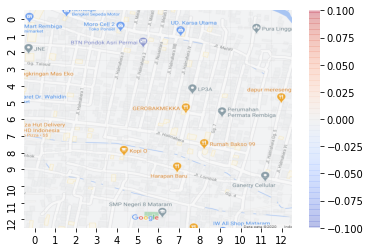

In [ ]:
c = case()
c.show()

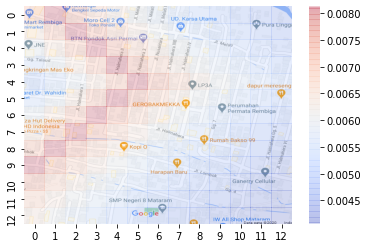

In [ ]:
c.add_case([[4, 0]])
c.show()

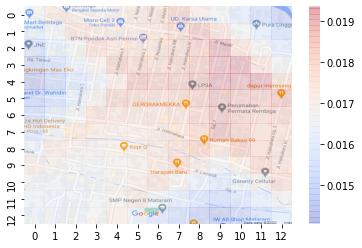

In [ ]:
c.add_case([[12, 9], [0, 12]])
c.show()

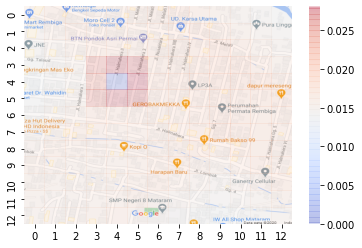

In [ ]:
c.not_found([[4, 4]])
c.show()